<a href="https://colab.research.google.com/github/Matt44320/ExerciciosSirius/blob/main/Clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [2]:
import pandas as pd

df = pd.read_csv('ideb.csv')
df2 = df[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa','ideb']]
df2.head()

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,53.9,167.8,165.60,2.3
1,2005,AC,49.3,151.8,149.60,1.8
2,2005,AC,48.8,163.6,155.80,1.9
3,2005,AC,48.8,159.0,153.39,1.9
4,2005,AC,74.7,138.0,134.19,2.3


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [5]:
df2_2019 = df2[df2['ano'] == 2019]
df2_2019_est = df2_2019.groupby(by = 'sigla_uf').mean()
df3 = df2_2019_est.reset_index()
df3.drop('ano', axis = 1, inplace = True)
df3.head()



,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,AC,97.500000,261.710000,238.777500,7.125000
1,AL,99.177778,298.418889,268.615556,7.622222
2,AM,93.340000,230.044000,213.610000,5.960000
3,AP,65.600000,229.686667,233.026667,2.233333
4,BA,79.136364,246.102727,236.764545,4.481818


### Atividade 3: Padronize os dados.

In [6]:
# importando a função
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = df3.copy()

# removendo dados categóricos
df_scaled.drop('sigla_uf', inplace=True, axis=1)

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# acrescentando a coluna estado
df_scaled['estado'] = df3['sigla_uf']

df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,estado
0,0.497862,0.407585,-0.034896,0.633974,AC
1,0.623050,2.625073,2.647442,0.937035,AL
2,0.187461,-1.505275,-2.297368,-0.076105,AM
3,-1.882375,-1.526861,-0.551877,-2.347545,AP
4,-0.872351,-0.535209,-0.215854,-0.977072,BA


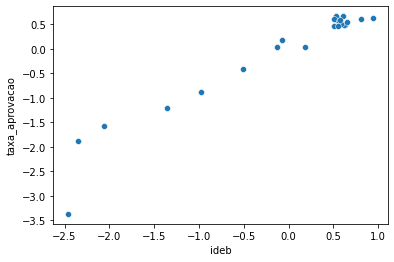

In [7]:
# importando seaborn
import seaborn as sns

# criando o gráfico de dispersão
sns.scatterplot(data=df_scaled, x='ideb', y='taxa_aprovacao');

In [36]:
# calculando a correlação entre as variáveis
df_scaled[['ideb','taxa_aprovacao']].corr()

,ideb,taxa_aprovacao
ideb,1.000000,0.810229
taxa_aprovacao,0.810229,1.000000


### Interpretação
A taxa de aprovação e a média do ideb aprestam uma forte correlação positiva.

### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

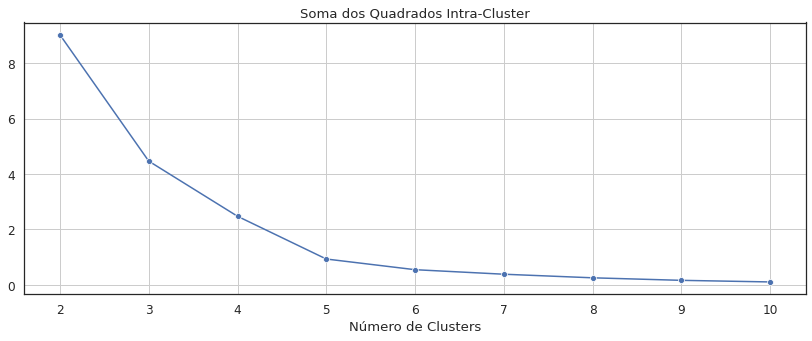

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})

inercia = []
k_min = 2
k_max = 10

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['ideb','taxa_aprovacao']])
    inercia.append(kmeans.inertia_)

sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

 ### Interpretação :
 Pelo método Cotovelo, o numéro de cluster ideal parece estar entre o 3 e o 6 mas não está claro. 

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

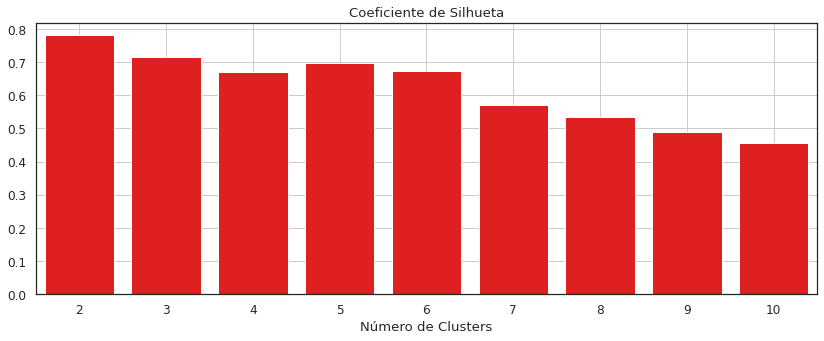

In [23]:
from sklearn.metrics import silhouette_score

silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['ideb','taxa_aprovacao']])
    silhueta.append(silhouette_score(df_scaled[['ideb','taxa_aprovacao']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

### Interpretação
Pelo uso do método de silhueta, os números de clusters que se aproximam do ideal (mais perto de 1) seria ou 2, 3 ou 5.

## Alternativa 
Vamos utilizar mais um código para determinar qual seria o numero ideal de cluster : 

In [28]:
def numero_otimo_clusters(k_min, k_max):
    from sklearn.cluster import KMeans
    import math
    inercia = []

    for i in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled[['ideb','taxa_aprovacao']])
        inercia.append(kmeans.inertia_)
    
    x0, y0 = k_min, inercia[0]
    x1, y1 = k_max, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+k_min
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

# calculando a quantidade ótima de clusters
k_otimo = numero_otimo_clusters(2,10)

print('Número otimizado de clusters: ' + str(k_otimo))

Número otimizado de clusters: 5


Por esse método, o número ideal de cluster é k = 5.

### Comparando os resultados :

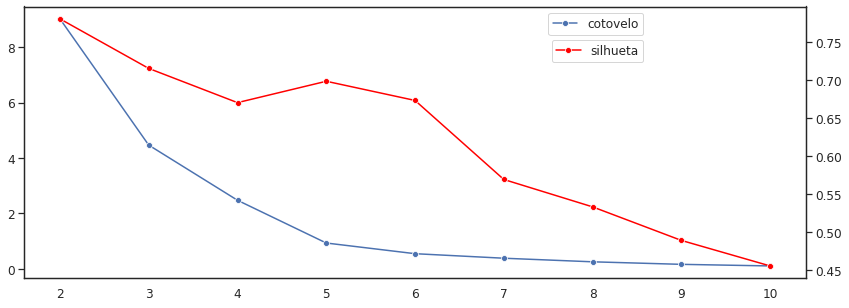

In [43]:
fig, ax = plt.subplots()

sns.lineplot(x=range(2,11), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(2,11), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

### Decisão final 
Pelos resultados acima, vamos definir k = 5 como o número de cluster ideal para a clusterizaçao dos dados.  

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled[['ideb', 'taxa_aprovacao']])

KMeans(n_clusters=5, random_state=42)

In [45]:
df3['grupos'] = kmeans.labels_.tolist()
df3.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
0,AC,97.500000,261.710000,238.777500,7.125000,0
1,AL,99.177778,298.418889,268.615556,7.622222,0
2,AM,93.340000,230.044000,213.610000,5.960000,3
3,AP,65.600000,229.686667,233.026667,2.233333,1
4,BA,79.136364,246.102727,236.764545,4.481818,2


In [65]:
df3['grupos'].value_counts()

0    16
3     4
1     2
2     2
4     1
Name: grupos, dtype: int64

### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

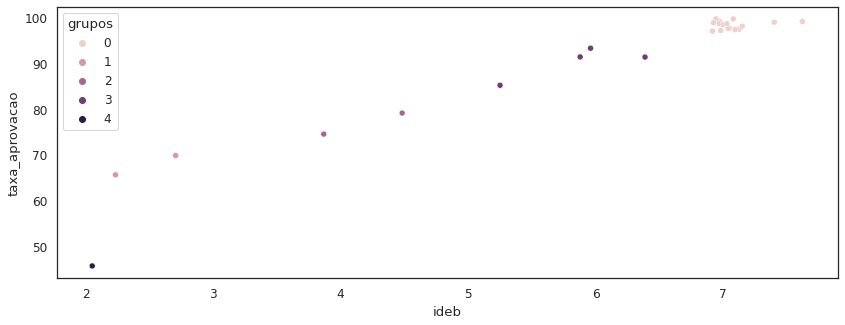

In [46]:
# criando um gráfico de dispersão levando em considração os grupos
sns.scatterplot(data=df3, x='ideb', y='taxa_aprovacao', hue='grupos');

### Atividade 8: Quais são os estados de cada grupo?

In [58]:
lista_g0 = df3['sigla_uf'].loc[df3['grupos'] == 0].to_list()
lista_g1 = df3['sigla_uf'].loc[df3['grupos'] == 1].to_list()
lista_g2 = df3['sigla_uf'].loc[df3['grupos'] == 2].to_list()
lista_g3 = df3['sigla_uf'].loc[df3['grupos'] == 3].to_list()
lista_g4 = df3['sigla_uf'].loc[df3['grupos'] == 4].to_list()

print(f'Estados do grupo 1 : {lista_g0}')
print(f'Estados do grupo 2 : {lista_g1}')
print(f'Estados do grupo 3 : {lista_g2}')
print(f'Estados do grupo 4 : {lista_g3}')
print(f'Estados do grupo 5 : {lista_g4}')

Estados do grupo 1 : ['AC', 'AL', 'CE', 'ES', 'GO', 'MA', 'MG', 'MT', 'PE', 'PR', 'RJ', 'RO', 'RS', 'SC', 'SP', 'TO']
Estados do grupo 2 : ['AP', 'PA']
Estados do grupo 3 : ['BA', 'RN']
Estados do grupo 4 : ['AM', 'MS', 'PB', 'PI']
Estados do grupo 5 : ['SE']


### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

In [59]:
df_grupo = df3.groupby(by = 'grupos').mean()
df_grupo

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,98.409546,262.895490,242.502656,7.081793
1,67.720000,227.315583,230.019833,2.469167
2,76.831515,241.791697,235.475939,4.174242
3,90.346310,248.255821,233.303884,5.869018
4,45.650000,236.502500,234.892500,2.050000


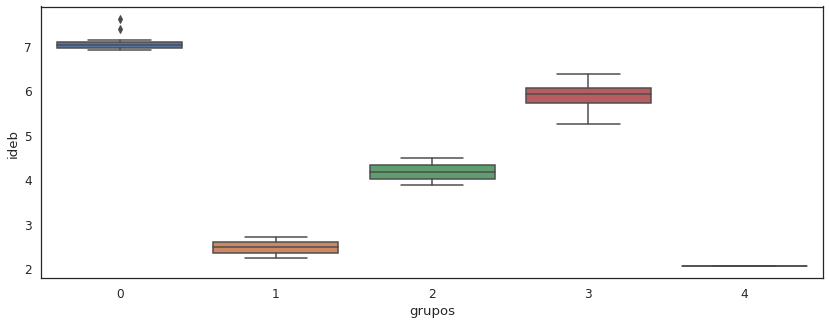

In [60]:
sns.boxplot(data = df3, x = df3['grupos'], y = df3['ideb']);

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

Vamos aplicar o teste de ANOVA para verificr se os grupos são significativamente diferentes.

Definindo as hipoteses :

H0 os 5 grupos são iguais

H1 pelo menos um dos grupos é diferente

Vamos considerar um nível de confiança de 95%

In [62]:
df_g1 = df3['ideb'].loc[df3['grupos'] == 0]
df_g2 = df3['ideb'].loc[df3['grupos'] == 1]
df_g3 = df3['ideb'].loc[df3['grupos'] == 2]
df_g4 = df3['ideb'].loc[df3['grupos'] == 3]
df_g5 = df3['ideb'].loc[df3['grupos'] == 4]

from scipy.stats import f_oneway

f_oneway(df_g1, df_g2, df_g3, df_g4, df_g5)

F_onewayResult(statistic=222.57702463896055, pvalue=2.825182477088257e-16)

O teste ANOVA apresenta um p valor inferior a 0,05. Por tanto rejeitamos a hipotese nula que os grupos são iguais. 
Podemos então concluir que pelo menos um grupo está significativamente diferente dos outros. Podemos realizar o teste de Tukey para verificar se todos são diferentes entre si.

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog = df3['ideb'],
                  groups = df3['grupos'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -4.6126  0.001 -5.2229 -4.0024   True
     0      2  -2.9076  0.001 -3.5178 -2.2973   True
     0      3  -1.2128  0.001 -1.6676 -0.7579   True
     0      4  -5.0318  0.001 -5.8705 -4.1931   True
     1      2   1.7051  0.001  0.8914  2.5187   True
     1      3   3.3999  0.001  2.6952  4.1045   True
     1      4  -0.4192 0.6967 -1.4157  0.5774  False
     2      3   1.6948  0.001  0.9901  2.3994   True
     2      4  -2.1242  0.001 -3.1208 -1.1277   True
     3      4   -3.819  0.001 -4.7287 -2.9093   True
----------------------------------------------------


Pelo teste de Tukey, verificamos que quase todos os grupos são diferentes com exceção do grupo 1 com o grupo 4 cujo valor de p foi superior a 0,05 significando que a hipotese nula que o grupo 1 e 4 são iguais foi aceita.

In [77]:
df4 = df3.loc[(df3['grupos'] == 4)|(df3['grupos'] == 1)]
df4

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
3,AP,65.60,229.686667,233.026667,2.233333,1
12,PA,69.84,224.944500,227.013000,2.705000,1
22,SE,45.65,236.502500,234.892500,2.050000,4


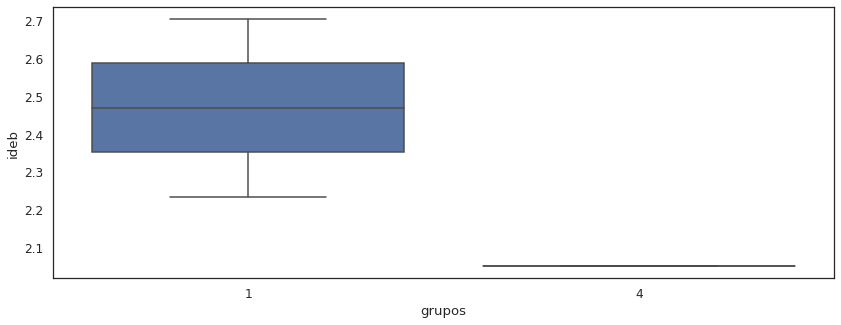

In [78]:
sns.boxplot(data = df4, x = df4['grupos'], y = df4['ideb']);

Apesar do teste de Tukey ter mostrado igualdade entre os dois grupos, pelo boxplot, vemos claramente que são dois grupos diferentes.
Por tanto, a divisão em 5 clusters parece separar os dados em grupos diferentes.

### Atividade 11: Faça a clusterização com outro valor para k.

### Clusterização com k = 2

In [79]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled[['ideb', 'taxa_aprovacao']])

KMeans(n_clusters=2, random_state=42)

In [82]:
df5 = df3.copy()

df5['grupos'] = kmeans.labels_.tolist()
df5.head()

,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,grupos
0,AC,97.500000,261.710000,238.777500,7.125000,0
1,AL,99.177778,298.418889,268.615556,7.622222,0
2,AM,93.340000,230.044000,213.610000,5.960000,0
3,AP,65.600000,229.686667,233.026667,2.233333,1
4,BA,79.136364,246.102727,236.764545,4.481818,1


In [81]:
df5['grupos'].value_counts()

0    20
1     5
Name: grupos, dtype: int64

### Representando graficamente o resultado : 

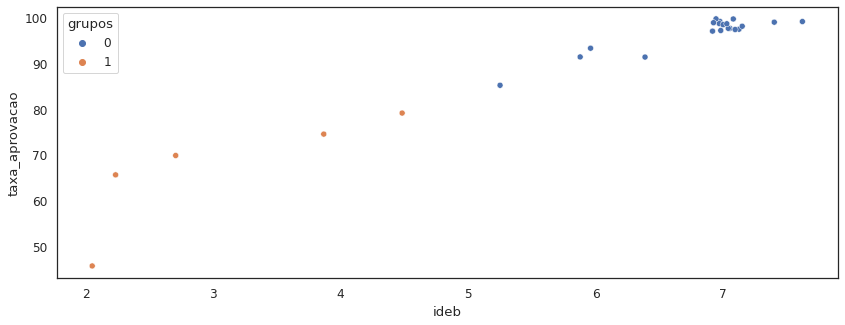

In [83]:
# criando um gráfico de dispersão levando em considração os grupos
sns.scatterplot(data=df5, x='ideb', y='taxa_aprovacao', hue='grupos');

In [84]:
df_grupo_2 = df5.groupby(by = 'grupos').mean()
df_grupo_2

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
grupos,,,,
0,96.796899,259.967556,240.662902,6.839238
1,66.950606,234.943412,233.176809,3.067364


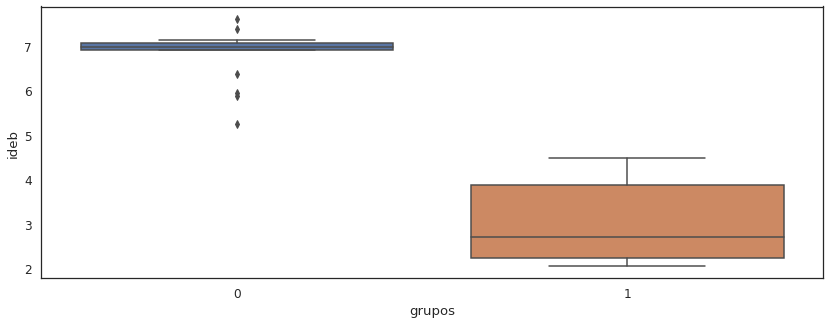

In [86]:
sns.boxplot(data = df5, x = 'grupos', y = 'ideb');

### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: Os dois valores de k apresentam grupos diferentes mas a divisão por 5 parece dividir os grupos com mais precisão.

### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!